# Урок 3

In [3]:
from matplotlib import pyplot as plt
import numpy as np

### 1. Задание (в программе)
Нарисуйте график функции:
y(x) = k∙cos(x – a) + b
для некоторых (2-3 различных) значений параметров k, a, b

In [4]:
def plot_cos(k, a, b):
    x = np.linspace(-5, 5, 100)
    y = k*np.cos(x - a) + b
    plt.plot(x, y)

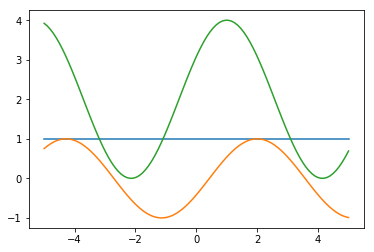

In [5]:
plot_cos(0, 0, 1)
plot_cos(1, 2, 0)
plot_cos(2, 1, 2)
plt.show()

### 3. Задание (в программе)
Напишите код, который будет переводить полярные координаты в декартовы.
Напишите код, который будет рисовать график окружности в полярных координатах.

In [6]:
def polar_to_cartesian(r, a):
    return r * np.cos(a), r * np.sin(a)

In [7]:
def plot_circle_polar(r):
    a = np.linspace(0, 360, 1000)
    X, Y = polar_to_cartesian(r, a)
    plt.plot(X, Y)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

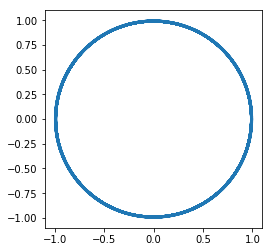

In [8]:
plot_circle_polar(1)

### 4. Задание (в программе)
Решите систему уравнений:

y = x^2 – 1

exp(x) + x∙(1 – y) = 1

In [9]:
from scipy.optimize import fsolve

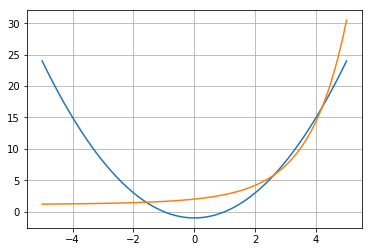

In [10]:
x = np.linspace(-5, 5, 100)
plt.plot(x, x**2-1)
plt.plot(x, 1-(1-np.exp(x))/x)
plt.grid(True)
plt.show()

In [11]:
def equations(p):
    x, y = p
    return (y - x**2 + 1, np.exp(x) + x*(1 - y) - 1)

In [12]:
x1, y1 = fsolve(equations, (-1.5, 2))
print(x1, y1)
x1, y1 = fsolve(equations, (2.5, 6))
print(x1, y1)
x1, y1 = fsolve(equations, (4, 17))
print(x1, y1)

-1.5818353528957307 1.5022030836701337
2.6181455730854517 5.854686241866948
4.200105841106243 16.640889076512234


Решите систему уравнений и неравенств:

y = x^2 – 1

exp(x) + x∙(1 – y) > 1

In [13]:
# y = x^2 – 1
def equation(x):
    return x**2 - 1

In [14]:
# y < (exp(x) + x - 1) / x
def inequation(x):
    return (x + np.exp(x) - 1)/x

In [15]:
# x^2 – 1 < (exp(x) + x - 1) / x
# 0 < (exp(x) + x - 1) / x - x^2 – 1
def subtraction(x):
    return inequation(x) - equation(x)

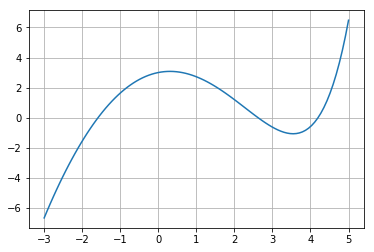

In [16]:
x = np.linspace(-3, 5, 100)
plt.plot(x, subtraction(x))
plt.grid(True)
plt.show()

По графику определяем, что итоговое неравенство положительно от первого корня до второго и от третьего корня до бесконечности (всё не включительно)

In [18]:
x1_s = fsolve(subtraction, -1.5)[0]
x1_e = fsolve(subtraction, 2.5)[0]
x2_s = fsolve(subtraction, 4)[0]

print(f"({x1_s}, {x1_e}), ({x2_s}, +Inf)")

(-1.5818353528958984, 2.6181455730853993), (4.20010584115497, +Inf)


# Урок 4

### 1. 
Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [127]:
np.random.randint(0, 37)

21

### 2.
Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере подбрасывания монетки.

In [132]:
def coin_throw():
    return np.random.uniform(0, 1) < 0.5

In [133]:
def mul_check(n=100):
    last_t = False
    t_count = 0
    tt_count = 0
    for i in range(n):
        if coin_throw():
            t_count += 1
            if last_t:
                tt_count += 1
            last_t = True
        else:
            last_t = False
    print(f'Вероятность орла: {t_count/n}')
    print(f'Вероятность 2х орлов подряд: {tt_count/(n-1)}')
    print(f'Разность между теоремой и полученным: {t_count/n * t_count/n - tt_count/(n-1)}')
    

In [136]:
mul_check(10000000)

Вероятность орла: 0.4998911
Вероятность 2х орлов подряд: 0.2499159249915925
Разность между теоремой и полученным: -2.4813132382506264e-05


Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [159]:
def sum_hist(n=100):
    x0 = np.random.uniform(0, 1, n)
    x1 = np.random.uniform(0, 1, n)
    x2 = np.random.uniform(0, 1, n)
    x3 = np.random.uniform(0, 1, n)
    x4 = np.random.uniform(0, 1, n)
    x5 = np.random.uniform(0, 1, n)
    x6 = np.random.uniform(0, 1, n)
    x7 = np.random.uniform(0, 1, n)
    x8 = np.random.uniform(0, 1, n)
    x9 = np.random.uniform(0, 1, n)
    x_sum = x0 + x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9
    num_bins = 100
    n, bins, patches = plt.hist(x_sum, num_bins)
    plt.xlabel('x_sum')
    plt.ylabel('Probability')
    plt.title('Histogram')
    plt.show()

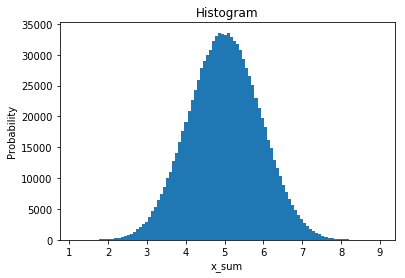

In [160]:
sum_hist(1000000)

### 3.
Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.

In [161]:
import itertools

In [215]:
def c_n_k(n, k):
    return np.math.factorial(n)/np.math.factorial(k)/np.math.factorial(n-k)

In [226]:
def monte_carlo(n=4, k=2, size=100):
    res_k = 0
    x = np.random.randint(0, 2, size)
    for i in range(n-1):
        x += np.random.randint(0, 2, size)
    for i in range(size):
        if x[i] == k:
            res_k += 1
    print(res_k, size, res_k/size)
    print(c_n_k(n, k)/2**n)
    print(f'Разница теории и полученного: {c_n_k(n, k)/2**n - res_k/size}')

In [229]:
monte_carlo(size=1000000)

375802 1000000 0.375802
0.375
Разница теории и полученного: -0.0008020000000000249


Повторите расчеты, взяв другие значения n и k.

In [231]:
monte_carlo(n=4, k=1, size=1000000)

249501 1000000 0.249501
0.25
Разница теории и полученного: 0.0004989999999999994


In [232]:
monte_carlo(n=6, k=2, size=1000000)

234052 1000000 0.234052
0.234375
Разница теории и полученного: 0.00032299999999998996


In [233]:
monte_carlo(n=6, k=3, size=1000000)

312339 1000000 0.312339
0.3125
Разница теории и полученного: 0.00016100000000002224


### 4.
Повторите расчеты, взяв другие значения n и k.

In [245]:
def perm_comb(n=4, k=2):
    #Размещения (если k=n - перестановка)
    if k == n:
        print('Перестановки')
    else:
        print('Размещения')
    for p in itertools.permutations("0123456789"[:n], k):
        print(''.join(str(x) for x in p))
    print('Сочетания')
    for p in itertools.combinations("0123456789"[:n], k):
        print(''.join(str(x) for x in p))

In [248]:
perm_comb(4, 2)

Размещения
01
02
03
10
12
13
20
21
23
30
31
32
Сочетания
01
02
03
12
13
23


In [249]:
perm_comb(4, 4)

Перестановки
0123
0132
0213
0231
0312
0321
1023
1032
1203
1230
1302
1320
2013
2031
2103
2130
2301
2310
3012
3021
3102
3120
3201
3210
Сочетания
0123


In [250]:
perm_comb(3, 1)

Размещения
0
1
2
Сочетания
0
1
2


In [251]:
perm_comb(3, 3)

Перестановки
012
021
102
120
201
210
Сочетания
012


In [253]:
perm_comb(2, 2)

Перестановки
01
10
Сочетания
01


### 5.
Дополните код расчетом коэффициента корреляции x и y по формуле

In [274]:
def regr(n=100, r=0.9):
    x = np.random.rand(n)
    y = r*x + (1-r)*np.random.rand(n)
    plt.plot(x, y, 'o')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    c = np.corrcoef(x, y)
    print(c)
    c_man = np.sum((x-np.mean(x))*(y-np.mean(y)))/np.sqrt(np.sum((x-np.mean(x))**2*np.sum((y-np.mean(y))**2)))
    print(c_man)
    
    a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
    b = (np.sum(y) - a*np.sum(x))/n
    
    plt.plot([0,1], [b, a+b])    
    plt.show()

[[1.         0.99404193]
 [0.99404193 1.        ]]
0.9940419263334522


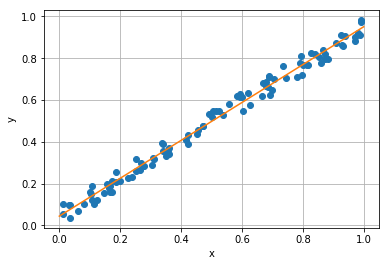

In [275]:
regr()

[[1.        0.9318574]
 [0.9318574 1.       ]]
0.9318573988120209


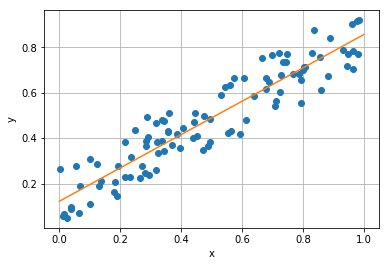

In [276]:
regr(r=0.7)

[[1.         0.11362976]
 [0.11362976 1.        ]]
0.11362975956105052


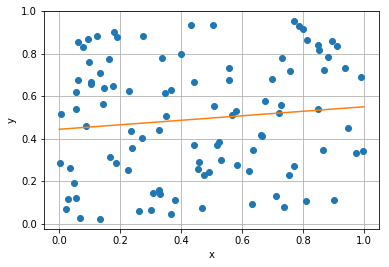

In [277]:
regr(r=0.1)